In [2]:
import pandas as pd
import os

# import from ../utils.py
import sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from utils import read_finalsum, read_finalsum_decomp, align_finalsum_with_uniprot, get_dbref_data

import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("darkgrid")

import plotly.express as px

c:\Users\liyoa\anaconda3\envs\sbna\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


# APPENDIX

In [19]:
ns_data = pd.read_csv("lung_genes_sbna.csv")
ns_data

# groupby mutation and list all unique pdb_ids
tmp = ns_data.groupby(["gene","mutations"])["pdb_id"].unique().reset_index()

for _, row in tmp.iterrows():
    gene = row["gene"]
    mut = row["mutations"]
    pdb_ids = row["pdb_id"]
    # print(gene)
    print(f"{mut}: {', '.join(pdb_ids)}")

# # for each gene, print each mutation like <mutation>: <list of pdb_ids>
# for gene, muts in tmp.items():
#     print(f"{gene}:")
#     print("\n".join([f"  {mut}: {', '.join(pdb_ids)}" for mut, pdb_ids in muts.items()]))


E17K: 2UZR, 2UZS
C1097S: 5IUI
F1174L: 4FNW, 2YJR
R1275K: 4FNX, 4FNY
V600E: 5C9C, 3IDP, 4MNF, 4G9R
L858R: 2ITZ, 6JWL, 5X26, 5X27, 5X28
I38M: 4CGC
Y596F: 2QOF
Y596F, Y602F, S768A: 2QOK
Y596F, Y602F, S768G: 2QOL
Y602F: 2QOD
Y602F, Y596F: 2QOI
K659M, C491A: 4J96, 4J98
C7S, C65A, C168A, C174S, C294A: 5LT0
G12C: 4LDJ, 4L8G
G12D: 8AFB, 8AZX, 6GOF, 8TXG, 4EPR, 6GJ7
G12V: 7C40, 6GOE, 8AZZ
L561F, S608E, S612A, S780A: 4ELL
W89Y: 4USG
G245S: 7DHY
M133L, V203A, N239Y, G245S, N268D: 2J1Y
N235K: 4LO9
N239Y: 4LOE
R273C: 4IBQ
R273C, T284R: 4IBZ
R273H: 4IBS
R280K: 6FF9
V272M: 7V97


In [26]:
ns_data = pd.read_csv("lung_genes_sbna.csv")
# for each gene, list all unique pdb_ids
# pdb_ids = ns_data.groupby("gene")["pdb_id"].unique().apply(lambda x: list(x)).reset_index()

# for each gene, list all pdb_ids where mutant = "N"
pdb_ids = ns_data[ns_data["mutant"] == "N"].groupby("gene")["pdb_id"].unique().apply(lambda x: list(x)).reset_index()
# rename pdb_id to "wild type PDBs"
pdb_ids.rename(columns={"pdb_id": "wild type PDBs"}, inplace=True)
# count number of wild type PDBs for each gene
pdb_ids["num wild type PDBs"] = pdb_ids["wild type PDBs"].apply(len)
pdb_ids["wild type PDBs"] = pdb_ids["wild type PDBs"].apply(lambda x: ", ".join(x))

# do the same for all pdb_ids where mutant is not "N"
pdb_ids_mutant = ns_data[ns_data["mutant"] != "N"].groupby("gene")["pdb_id"].unique().apply(lambda x: list(x)).reset_index()
# rename pdb_id to "mutant PDBs"
pdb_ids_mutant.rename(columns={"pdb_id": "mutant PDBs"}, inplace=True)

# convert to string of pdb_ids separated by commas
pdb_ids_mutant["num mutant PDBs"] = pdb_ids_mutant["mutant PDBs"].apply(len)
pdb_ids_mutant["mutant PDBs"] = pdb_ids_mutant["mutant PDBs"].apply(lambda x: ", ".join(x))





# merge the two dataframes
pdb_ids = pdb_ids.merge(pdb_ids_mutant, on="gene", how="outer")

# fill NaN count values with 0
pdb_ids["num wild type PDBs"].fillna(0, inplace=True)
pdb_ids["num mutant PDBs"].fillna(0, inplace=True)
pdb_ids["total PDBs"] = pdb_ids["num wild type PDBs"] + pdb_ids["num mutant PDBs"]

# fill NaN values with empty lists
pdb_ids.fillna("", inplace=True)

# count total number of PDBs for each gene


# sort by total PDBs
pdb_ids = pdb_ids.sort_values("total PDBs", ascending=False)

# drop counts and convert float total to int
# pdb_ids.drop(["num wild type PDBs", "num mutant PDBs"], axis=1, inplace=True)
pdb_ids["total PDBs"] = pdb_ids["total PDBs"].astype(int)


# get the cancer_role for that gene
cancer_role = ns_data[["gene", "cancer_role"]].drop_duplicates()
pdb_ids = pdb_ids.merge(cancer_role, on="gene", how="left")
# fill NaN values with "unknown"
pdb_ids.fillna("unknown", inplace=True)

pdb_ids#.to_csv("HASHDASHDHAHDAS.csv", index=False)


,gene,wild type PDBs,num wild type PDBs,mutant PDBs,num mutant PDBs,total PDBs,cancer_role
0,ALK,"3AOX, 8ARJ, 4CMT, 4CTB, 7R7R, 5IMX, 6CDT",7.0,"4FNX, 4FNW, 5IUI, 5IUG, 4FNY, 4FNZ, 2YJR",7.0,14,oncogene
1,KRAS,"6GOD, 6MBQ",2.0,"4LDJ, 4L8G, 8AFB, 8AZX, 7C40, 6GOF, 8TXG, 4EPR...",11.0,13,oncogene
2,EPHA3,"2QOO, 2QO2, 2QOQ, 2QO7, 3FXX, 2GSF, 2QO9",7.0,"2QOD, 2QOF, 2QOI, 2QOL, 2QOK",5.0,12,unknown
3,BRAF,"3II5, 3Q4C, 3PRF, 3PPK, 3D4Q, 5FD2, 4.00E+26",7.0,"5C9C, 3IDP, 4MNF, 4G9R",4.0,11,oncogene
4,KEAP1,"8EJR, 7K2F, 7K2A, 7K2K, 7K2E, 7K2D",6.0,"5WFL, 5WHL, 7K29, 5WFV, 5WG1",5.0,11,TSG
5,TP53,2OCJ,1.0,"4LOE, 4LO9, 2J1Y, 4IBS, 4IBQ, 4IBZ, 7V97, 6FF9...",9.0,10,TSG
6,EED,"7SI5, 7SI4, 3JPX, 3JZG, 3K26, 3K27, 5U5H, 5H13...",9.0,,0.0,9,TSG
7,EGFR,"7SI1, 7UKV, 3POZ, 8F1X",4.0,"2ITZ, 6JWL, 5X26, 5X27, 5X28",5.0,9,oncogene
8,MAP2K1,"4LMN, 4U7Z, 3E8N, 3DY7, 3V04, 4U81, 4U80, 3PP1",8.0,,0.0,8,oncogene
9,KDR,"1Y6A, 1Y6B, 3VHK, 3VHE, 3VID",5.0,,0.0,5,oncogene


In [25]:
# count number of pdbs per cancer role
# pdb_ids.groupby("cancer_role")["total PDBs"].sum()
# count number of wild type pdbs per cancer role
pdb_ids.groupby("cancer_role")["num wild type PDBs"].sum()


cancer_role
TSG         22.0
fusion       6.0
oncogene    57.0
unknown      9.0
Name: num wild type PDBs, dtype: float64

# ================

In [12]:
chainA = read_finalsum("1TSR", "A")
chainB = read_finalsum("1TSR", "B")
chainC = read_finalsum("1TSR", "C")

# inner join on num
merged = pd.merge(chainA, chainB, on="num", suffixes=('_A', '_B'))
merged = pd.merge(merged, chainC, on="num")
merged.columns = ["res_A", "res_code_A", "num", "network_score_A", "res_B", "res_code_B", "network_score_B", "res_C", "res_code_C", "network_score_C"]
merged

# calculate correlation between network scores
correlation = merged[["network_score_A", "network_score_B", "network_score_C"]].corr()
correlation

,network_score_A,network_score_B,network_score_C
network_score_A,1.000000,0.967444,0.970902
network_score_B,0.967444,1.000000,0.978630
network_score_C,0.970902,0.978630,1.000000


In [6]:
cgc_data = pd.read_csv('../data_prep/Census_all_with_pdb.csv')
cgc_data.head(2)

,Gene Symbol,Name,Entrez GeneId,Genome Location,Tier,Hallmark,Chr Band,Somatic,Germline,Tumour Types(Somatic),...,Tissue Type,Molecular Genetics,Role in Cancer,Mutation Types,Translocation Partner,Other Germline Mut,Other Syndrome,Synonyms,PDB Structures,n_structures
0,A1CF,APOBEC1 complementation factor,29974.0,10:50799421-50885675,2,NaN,10q11.23,yes,NaN,melanoma,...,E,NaN,oncogene,Mis,NaN,NaN,NaN,"ACF,ACF64,ACF65,APOBEC1CF,ASP,CCDS73133.1,ENSG...",['2CPD'],1
1,ABI1,abl-interactor 1,10006.0,10:26746593-26860935,1,Yes,10p12.1,yes,NaN,AML,...,L,Dom,"TSG, fusion",T,KMT2A,NaN,NaN,"ABI-1,CCDS7150.1,E3B1,ENSG00000136754.17,NM_00...",['7LXE'],1


In [4]:
lung_genes = pd.read_excel('lung_genes.xlsx', sheet_name="final")
lung_genes

,Gene,Name,PDB,Resolution,Chain,Start,End,Uniprot,assoc_gene,length,Notes
0,CD74,"CD74 molecule, major histocompatibility comple...",1ICF,2.00,I,194,258,P04233,CD74,65,NaN
1,KIF5B,kinesin family member 5B,1MKJ,2.70,A,1,349,P33176,KIF5B,349,NaN
2,MAP2K2,mitogen-activated protein kinase kinase 2,1S9I,3.20,A,55,400,P36507,MAP2K2,346,there's no better resolutions that properly re...
3,TP53,tumor protein p53,1TSR,2.20,A,94,312,P04637,TP53,219,NaN
4,TP53,tumor protein p53,1TSR,2.20,B,94,312,P04637,TP53,219,NaN
...,...,...,...,...,...,...,...,...,...,...,...
63,SDC4,syndecan 4,8BLV,1.50,C,191,198,P31431,SDC4,8,as two. Is small compared to other structure
64,SDC4,syndecan 4,8BLV,1.50,D,191,198,P31431,SDC4,8,NaN
65,BIRC6,baculoviral IAP repeat containing 6,8E2F,2.47,A,1,4857,Q9NR09,BIRC6,4857,NaN
66,BAP1,BRCA1 associated protein-1 (ubiquitin carboxy-...,8H1T,3.00,L,1,729,Q92560,BAP1,729,NaN


In [4]:
print("1") if 1 else None

1


# Comparing NS for wild type vs mutant 

In [2]:
print("""4LMN
4U7Z
3E8N
3DY7
3V04
4U81
4U80
3PP1
7SI5
7SI4
3JPX
3JZG
3K26
3K27
5U5H
5H13
5U5K
1Y6A
1Y6B
3VHK
3VHE
3VID""".split("\n"))

['4LMN', '4U7Z', '3E8N', '3DY7', '3V04', '4U81', '4U80', '3PP1', '7SI5', '7SI4', '3JPX', '3JZG', '3K26', '3K27', '5U5H', '5H13', '5U5K', '1Y6A', '1Y6B', '3VHK', '3VHE', '3VID']


In [9]:
# EGFR pdbs
pdbs = ['7SI1', "7UKV", "3POZ", "8F1X", "4LQM", "2ITZ", "6JWL", "5X27"]

# KRAS 
pdbs = ["6GOD", "5UK9", "6MBU", "4LDJ", "4L8G", "8AFB", "8AZX", "6GOF", "7RPZ", "8TXG", "6GJ7", "6GOE", "8AZZ", "7C40", "4EPT", "6MBQ", "4EPR"]

# BRAF
pdbs = ["3II5", "3Q4C", "3PRF", "3PPK", "3D4Q", "5FD2", "8F7P", "4FC0", "4E26", "5C9C", "3IDP", "4MNF", "4G9R"]

pdbs = ['4LMN', '4U7Z', '3E8N', '3DY7', '3V04', '4U81', '4U80', '3PP1', '7SI5', '7SI4', '3JPX', '3JZG', '3K26', '3K27', '5U5H', '5H13', '5U5K', '1Y6A', '1Y6B', '3VHK', '3VHE', '3VID']

In [7]:
tmp2 = pd.DataFrame()
for pdb_id in pdbs:
    try:
        data = get_dbref_data(pdb_id)
        chains = [i['chain'] for i in data]
        for chain in chains:
            tmp = read_finalsum(pdb_id, chain).merge(read_finalsum_decomp(pdb_id, chain), on=['num', 'res'], how='inner').drop('res_code_x', axis=1)
            tmp = tmp.rename(columns={"res_code_y": "res_code"})
            tmp = align_finalsum_with_uniprot(tmp, pdb_id, chain)
            tmp = tmp[tmp['uniprot_num']==600].reset_index(drop=True)
            tmp['pdb_id'] = pdb_id
            tmp['chain'] = chain
            tmp2 = pd.concat([tmp2, tmp])
        # tmp = read_finalsum(pdb_id, "A").merge(read_finalsum_decomp(pdb_id, "A"), on=['num', 'res'], how='inner').drop('res_code_x', axis=1)

    except:
        print(f"Failed to process {pdb_id} with error:")
        continue
    # rename columns
    # tmp = tmp.rename(columns={"res_code_y": "res_code"})
    # print(pdb_id)
    # tmp = align_finalsum_with_uniprot(tmp, pdb_id, "A")
    # tmp = tmp[tmp['uniprot_num']==600].reset_index(drop=True)
    # tmp['pdb_id'] = pdb_id
    # tmp2 = pd.concat([tmp2, tmp])
tmp2.sort_values(by="res")

,res,num,network_score,Acid,SecondOrderIntermodularDegree_AVERAGE,NodeEdgeBetweennessSTRIDE_sidechain_MAX,LigandMULTIMERCENTROIDSC_MIN,res_code,uniprot_num,uniprot_res,pdb_id,chain
0,GLU,600,-0.765052,GLU600,-0.965339,-0.469700,-0.669987,E,600,V,4G9R,B
0,GLU,600,-0.506577,GLU600,-0.774697,0.480358,0.212239,E,600,V,4MNF,B
0,GLU,600,-0.506577,GLU600,-0.774697,0.480358,0.212239,E,600,V,4MNF,A
0,GLU,600,-0.682910,GLU600,-0.965339,-0.387558,-0.669987,E,600,V,4G9R,A
0,VAL,600,-0.693710,VAL600,-0.210208,-0.095823,0.387679,V,600,V,4E26,B
0,VAL,600,-0.797714,VAL600,-0.210208,-0.199827,0.387679,V,600,V,4E26,A
0,VAL,599,0.639018,VAL599,-0.134591,-0.014932,-0.788541,V,600,V,4FC0,B
0,VAL,599,0.482846,VAL599,-0.134591,-0.171104,-0.788541,V,600,V,4FC0,A
0,VAL,600,0.586764,VAL600,-0.810437,0.649224,-0.747977,V,600,V,8F7P,B
0,VAL,600,0.022660,VAL600,-0.810437,0.085120,-0.747977,V,600,V,8F7P,A


c:\Users\liyoa\anaconda3\envs\sbna\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\liyoa\anaconda3\envs\sbna\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


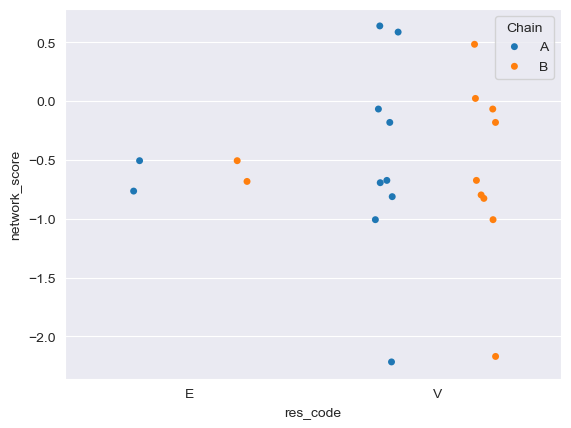

In [8]:

tmp2 = tmp2.sort_values("res")


sns.stripplot(
    data=tmp2, x="res_code", y="network_score", hue="chain",
    dodge=True, legend=False,
)
# add legend
plt.legend(title="Chain", loc="upper right", labels=["A", "B"])
plt.show()

# analysis

In [32]:
ns_data = pd.read_csv("wt_ns_aggregated.csv")

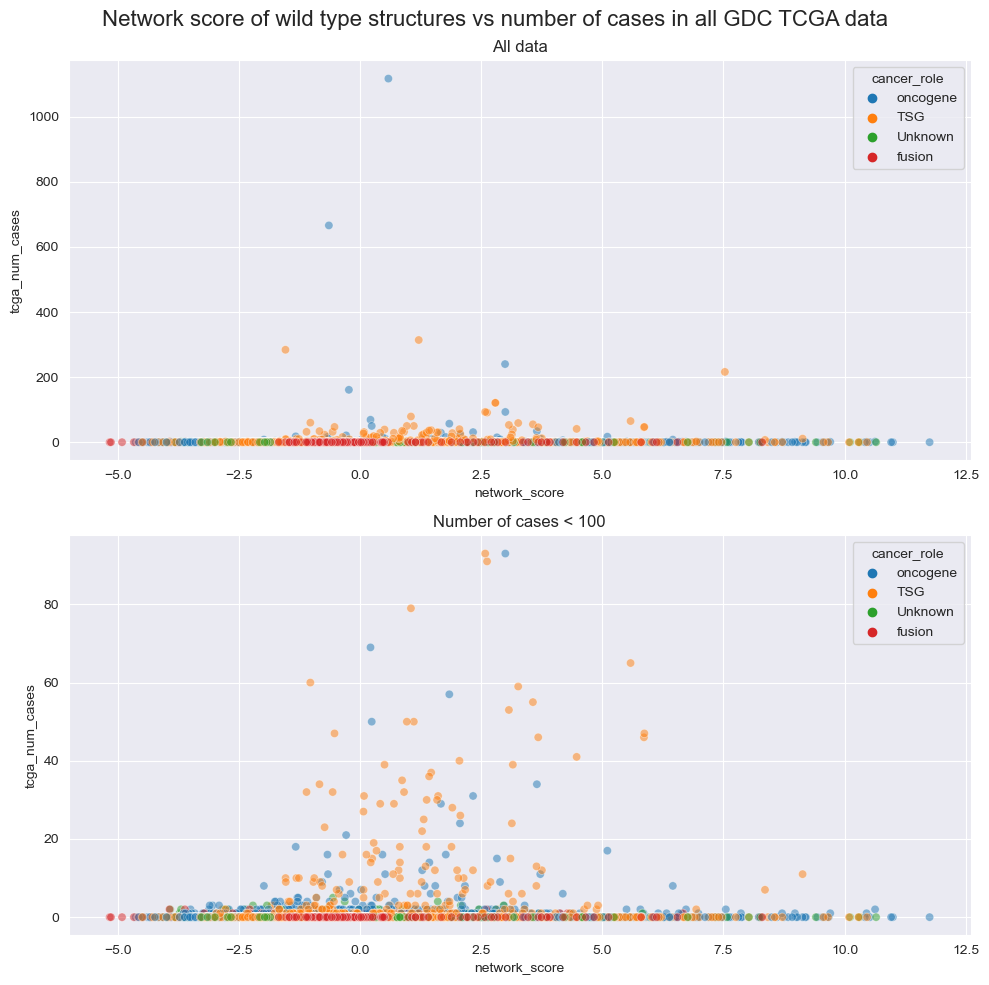

In [33]:
# 2 subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

sns.scatterplot(data=ns_data, x="network_score", y="tcga_num_cases", hue="cancer_role", alpha=0.5, ax=axs[0])
sns.scatterplot(data=ns_data[ns_data['tcga_num_cases']<100], x="network_score", y="tcga_num_cases", hue="cancer_role", alpha=0.5, ax=axs[1])

# add title
axs[0].set_title("All data")
axs[1].set_title("Number of cases < 100")

# set super title
fig.suptitle("Network score of wild type structures vs number of cases in all GDC TCGA data", fontsize=16)
plt.tight_layout()
plt.show()

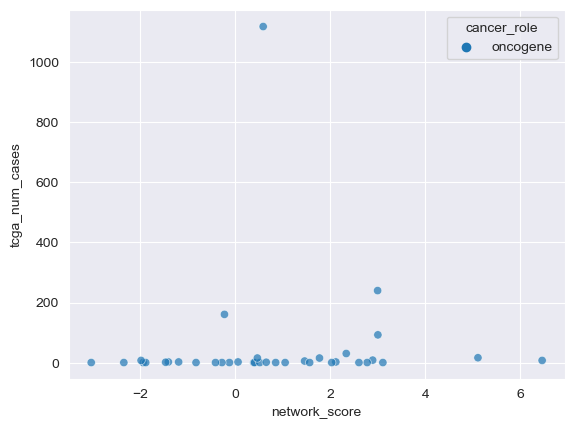

In [34]:
# tmp = ns_data[ns_data['gene']=="TP53"]
tmp = ns_data[(ns_data['cancer_role']=="TSG") & (ns_data['tcga_num_cases']>0)]
tmp = ns_data[(ns_data['gene']=="KRAS") & (ns_data['tcga_num_cases']>0)]
# plot network score vs number of cases
sns.scatterplot(data=tmp, x="network_score", y="tcga_num_cases", hue="cancer_role", alpha=0.7)
plt.show()

In [35]:
# no max cols
pd.set_option('display.max_columns', None)

diff_aas = pd.read_csv("diff_aas_as_rows.csv")
diff_aas['diff_ns'] = diff_aas['mut_ns'] - diff_aas['wt_ns']
diff_aas.head()


,gene,cancer_role,cgc_tier,uniprot_num,wt_aa,mut_aa,wt_ns,mut_ns,diff_ns,wt_sd,mut_sd,wt_neb,mut_neb,wt_ld,mut_ld,num_ssm_affected_cases,num_cases_in_gene,ssm_affected_cases_percentage,num_gdc_ssm_affected_cases,num_gdc_ssm_cases,count_TCGA-LUAD,total_TCGA-LUAD,perc_TCGA-LUAD,count_TCGA-LUSC,total_TCGA-LUSC,perc_TCGA-LUSC,count_all_lung,total_all_lung,perc_all_lung
0,RB1,TSG,1,780,S,A,-0.370530,5.803530,6.174060,-0.198296,0.247563,-0.172234,5.555966,0.000000,0.000000,0,0,0.00,0,0,0,0,0.0,0,0,0.0,0,0,0.0
1,FGFR2,oncogene,1,659,K,M,-1.209555,2.923126,4.132681,-1.022663,0.930025,-0.481753,0.398724,-0.294861,-1.594377,0,0,0.00,0,0,0,0,0.0,0,0,0.0,0,0,0.0
2,ALK,oncogene,1,1275,R,Q,0.656542,4.539066,3.882524,-0.407015,2.126575,0.619538,2.000970,-0.444019,-0.411522,7,3038,0.23,7,16477,0,0,0.0,0,0,0.0,0,0,0.0
3,FGFR2,oncogene,1,659,K,Q,-1.209555,2.541842,3.751397,-1.022663,0.597328,-0.481753,0.325219,-0.294861,-1.619295,0,0,0.00,0,0,0,0,0.0,0,0,0.0,0,0,0.0
4,KIF5B,fusion,1,168,C,A,0.857446,2.653526,1.796080,0.823687,0.971592,-0.239222,0.132023,-0.272981,-1.549911,0,0,0.00,0,0,0,0,0.0,0,0,0.0,0,0,0.0


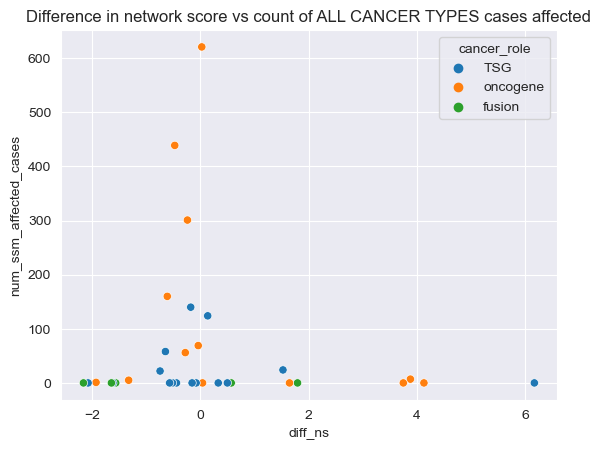

In [38]:
# plot diff_ns vs num_ssm_affected_cases
col = "num_ssm_affected_cases"
# sns.scatterplot(data=diff_aas[diff_aas[col]!=0], x="diff_ns", y=col, hue="cancer_role")
sns.scatterplot(data=diff_aas, x="diff_ns", y=col, hue="cancer_role")
plt.title("Difference in network score vs count of ALL CANCER TYPES cases affected")
plt.show()

# test for ns vs mut freq - binning data and statistical test

In [16]:
ns_data = pd.read_csv("wt_ns_aggregated.csv")

# if cancer_role is unknown or fusion, set new_cancer_role to other, and if TSG or oncogene, set new_cancer_role to "TSG/Oncogene"
ns_data.loc[ns_data['cancer_role'].isin(["Unknown", "fusion"]), 'cancer_role'] = "unknown/fusion"
ns_data.loc[ns_data['cancer_role'].isin(["TSG", "oncogene"]), 'cancer_role'] = "TSG/oncogene"

# bin data by network score with -inf to -2.5, -2.5 to 2.5 and 2.5 to inf
bins = [-float("inf"), -2.5, 2.5, float("inf")]
labels = ["lower", "medium", "higher"] 
ns_data['ns_bin'] = pd.cut(ns_data['network_score'], bins=bins, labels=labels)

# create table of sum of tcga_num_cases by ns_bin vs cancer_role
ns_data.groupby([ 'cancer_role', 'ns_bin'])['tcga_num_cases'].sum().unstack().fillna(0)


C:\Users\liyoa\AppData\Local\Temp\ipykernel_33780\2912491998.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ns_data.groupby([ 'cancer_role', 'ns_bin'])['tcga_num_cases'].sum().unstack().fillna(0)


KeyError: 'Column not found: tcga_num_cases'

# plot by residue number on x axis and network score on y
goal is to plot the mutational hotspot locations too

In [9]:

dat = pd.read_csv("lung_genes_sbna.csv")
dat = dat[dat['uniprot_num']!="?"]
dat['uniprot_num'] = dat['uniprot_num'].astype(int)
# dat['gene'].unique()
dat.head()

,gene,pdb_id,chain,sbna_aa3,sbna_num,sbna_aa1,uniprot_num,uniprot_aa,network_score,SecondOrderIntermodularDegree_AVERAGE,NodeEdgeBetweennessSTRIDE_sidechain_MAX,LigandMULTIMERCENTROIDSC_MIN,mutant,mutations,cgc_tier,cancer_role,uniprot_aa_type,sbna_aa_type
0,AKT1,2UVM,A,MET,1,M,1,M,-3.289764,-0.887739,-0.599135,1.802890,N,NaN,1,oncogene,Hydrophobic,Hydrophobic
1,AKT1,2UVM,A,SER,2,S,2,S,-3.211822,-0.780412,-0.514186,1.917224,N,NaN,1,oncogene,Polar uncharged,Polar uncharged
2,AKT1,2UVM,A,ASP,3,D,3,D,-2.323640,-0.348912,-0.599135,1.375593,N,NaN,1,oncogene,Polar charged negative,Polar charged negative
3,AKT1,2UVM,A,VAL,4,V,4,V,-1.720478,-0.423430,-0.430810,0.866237,N,NaN,1,oncogene,Hydrophobic,Hydrophobic
4,AKT1,2UVM,A,ALA,5,A,5,A,-0.735485,-0.359177,0.880892,1.257200,N,NaN,1,oncogene,Hydrophobic,Hydrophobic


In [15]:
gene = "TP53"
tmp = dat[dat['gene'] == gene]
tmp.sort_values("uniprot_num", inplace=True)

# Filter data for the specified PDB IDs
pdb_ids = ['2OCJ', '4IBS', '7DHY']
tmp = tmp[tmp['pdb_id'].isin(pdb_ids)].reset_index(drop=True)

# Define legend labels
legend_labels = {
    '2OCJ': '2OCJ (wild type)',
    '4IBS': '4IBS (R273H)',
    '7DHY': '7DHY (G245S)',
}

# Plot
fig = px.line(tmp, x='uniprot_num', y='network_score', color='pdb_id',
              title='Network Score vs UniProt Num for Gene {}'.format(gene),
              labels={'network_score': 'Network Score', 'uniprot_num': 'UniProt Number'},
              hover_data=['pdb_id'])

# Rename legend entries and set line opacity
for pdb_id in pdb_ids:
    fig.for_each_trace(
        lambda trace: trace.update(name=legend_labels[pdb_id], opacity=0.7) if trace.name == pdb_id else ()
    )

fig.show()


C:\Users\liyoa\AppData\Local\Temp\ipykernel_2524\1177384308.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
import plotly.express as px

# Sample data (replace with your actual data)
gene = "KRAS"
tmp = dat[dat['gene'] == gene].reset_index(drop=True)
tmp.sort_values("uniprot_num", inplace=True)

# Filter data for the specified PDB IDs
pdb_ids = ['6GOD', '6GOE', '6GOF']
tmp = tmp[tmp['pdb_id'].isin(pdb_ids)].reset_index(drop=True)

# Define legend labels
legend_labels = {
    '6GOD': '6GOD (wild type)',
    '6GOE': '6GOE (G12V)',
    '6GOF': '6GOF (G12D)'
    
}

# Plot
fig = px.line(tmp, x='uniprot_num', y='network_score', color='pdb_id',
              title='Network Score vs UniProt Num for Gene {}'.format(gene),
              labels={'network_score': 'Network Score', 'uniprot_num': 'UniProt Number'},
              hover_data=['pdb_id'])

# Rename legend entries
for i, pdb_id in enumerate(pdb_ids):
    fig.data[i].name = legend_labels[pdb_id]

fig.show()


# tp53 analysis mutants vs wild type

In [12]:
ns_data = pd.read_csv("lung_genes_sbna.csv")
ns_data[(ns_data['gene']=="TP53") & (ns_data['uniprot_num'].isin([str(i) for i in range(270, 275)])) & (ns_data['pdb_id'].isin(["2OCJ", "4IBS", "7V97"]))]

,gene,pdb_id,chain,sbna_aa3,sbna_num,sbna_aa1,uniprot_num,uniprot_aa,network_score,SecondOrderIntermodularDegree_AVERAGE,NodeEdgeBetweennessSTRIDE_sidechain_MAX,LigandMULTIMERCENTROIDSC_MIN,mutant,mutations,cgc_tier,cancer_role
50172,TP53,2OCJ,A,PHE,270,F,270,F,3.597299,1.067343,2.529955,0.000000,N,NaN,1,TSG
50173,TP53,2OCJ,A,GLU,271,E,271,E,0.527466,0.027699,0.499767,0.000000,N,NaN,1,TSG
50174,TP53,2OCJ,A,VAL,272,V,272,V,0.858813,1.130576,-0.271763,0.000000,N,NaN,1,TSG
50175,TP53,2OCJ,A,ARG,273,R,273,R,1.213013,0.363675,0.849337,0.000000,N,NaN,1,TSG
50176,TP53,2OCJ,A,VAL,274,V,274,V,9.133482,1.837869,7.295613,0.000000,N,NaN,1,TSG
50366,TP53,2OCJ,B,PHE,270,F,270,F,3.100208,1.067343,2.032865,0.000000,N,NaN,1,TSG
50367,TP53,2OCJ,B,GLU,271,E,271,E,0.081973,0.027699,0.054274,0.000000,N,NaN,1,TSG
50368,TP53,2OCJ,B,VAL,272,V,272,V,0.858813,1.130576,-0.271763,0.000000,N,NaN,1,TSG
50369,TP53,2OCJ,B,ARG,273,R,273,R,1.213013,0.363675,0.849337,0.000000,N,NaN,1,TSG
50370,TP53,2OCJ,B,VAL,274,V,274,V,9.133482,1.837869,7.295613,0.000000,N,NaN,1,TSG


# compare WT vs MUT

In [21]:
ns_data = pd.read_csv("sbna_wt_vs_mut.csv")
ns_data.head(2)

,gene,uniprot_num,uniprot_aa,sbna_aa1,network_score_wt,SecondOrderIntermodularDegree_AVERAGE,NodeEdgeBetweennessSTRIDE_sidechain_MAX,LigandMULTIMERCENTROIDSC_MIN,cgc_tier,cancer_role,cbioportal_freq,uniprot_aa_type,mutations,network_score_mut,diff_ns
0,AKT1,1,M,M,-1.442056,-0.831746,-0.478642,0.131669,1,oncogene,0,Nonpolar,E17K,-0.160771,1.281285
1,AKT1,2,S,S,-1.028050,-0.712966,-0.406600,-0.091516,1,oncogene,0,Polar,E17K,0.357676,1.385726


In [22]:
# TO CREATE NICE LABEL IN PLOT:

# Determine the maximum width of the gene names
max_gene_length = ns_data['gene'].str.len().max()

# Create the combined label with dynamic space
ns_data['tmp_label'] = ns_data['gene'] + ": " + ns_data['mutations']


In [23]:
"""AKT1: E17K
ALK: F1174L
BRAF: V600E
EGFR: L858R
KRAS: G12C
KRAS: G12D
KRAS: G12V
TP53: R273H
TP53: R273C
TP53: R273C, T284R
TP53: V272M
TP53: R280K"""
print(ns_data['tmp_label'].unique())

['AKT1: E17K' 'ALK: F1174L' 'ALK: C1097S' 'ALK: R1275K' 'BRAF: V600E'
 'EGFR: L858R' 'EPHA3: Y596F' 'EPHA3: Y596F, Y602F, S768A'
 'EPHA3: Y596F, Y602F, S768G' 'EPHA3: Y602F' 'EPHA3: Y602F, Y596F'
 'FGFR2: K659M, C491A' 'KIF5B: C7S, C65A, C168A, C174S, C294A'
 'KRAS: G12C' 'KRAS: G12D' 'KRAS: G12V' 'RB1: L561F, S608E, S612A, S780A'
 'SUB1: W89Y' 'TP53: G245S' 'TP53: M133L, V203A, N239Y, G245S, N268D'
 'TP53: N235K' 'TP53: N239Y' 'TP53: R273C' 'TP53: R273C, T284R'
 'TP53: R273H' 'TP53: V272M' 'TP53: R280K']


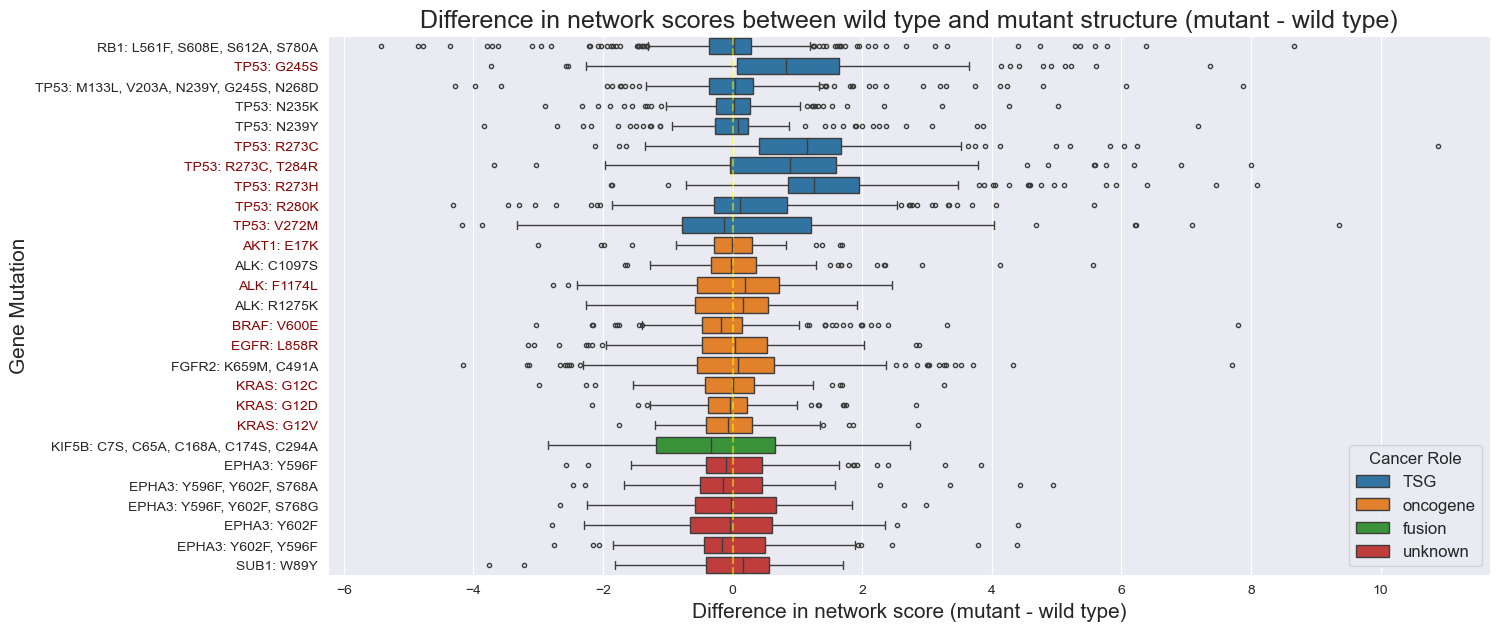

In [24]:
# mutations that are present in lung cancer
highlight_xticks = ["AKT1: E17K", "ALK: F1174L", "BRAF: V600E", "EGFR: L858R",
                    "KRAS: G12C", "KRAS: G12D", "KRAS: G12V", "TP53: R273H", "TP53: G245S",
                    "TP53: R273C", "TP53: R273C, T284R", "TP53: V272M", "TP53: R280K"]


# plot diff_ns by mutations boxplot
plt.figure(figsize=(15, 7))
# colour by cancer_role
# default seaborn palette
palette = sns.color_palette()
colors = {'TSG': palette[0], 'oncogene': palette[1], 'unknown': palette[3], 'fusion': palette[2]}
# colors = {'TSG': '#1f77b4', 'oncogene': '#2ca02c', 'unknown': '#ff7f0e', 'fusion': '#9467bd'}

# sort by cancer_role and tmp_label
# sort cancer role by TSG, oncogene, fusion, unknown
order = ['TSG', 'oncogene', 'fusion', 'unknown']
ns_data['cancer_role'] = pd.Categorical(ns_data['cancer_role'], order)
# sort tmp_label by highlight_xticks
# ns_data['tmp_label'] = pd.Categorical(ns_data['tmp_label'], highlight_xticks)
# sort by cancer_role and tmp_label
ns_data = ns_data.sort_values(['cancer_role', 'tmp_label'])

# ns_data = ns_data.sort_values(['cancer_role', 'tmp_label'])
# make markers for outliers smaller
sns.boxplot(x='diff_ns', y='tmp_label', data=ns_data, hue='cancer_role', palette=colors, fliersize=3)

# put line at 0
plt.axvline(0, color='yellow', linestyle='--', alpha=0.5)
plt.title("Difference in network scores between wild type and mutant structure (mutant - wild type)", fontsize=18)
plt.xlabel("Difference in network score (mutant - wild type)", fontsize=15)
plt.ylabel("Gene Mutation", fontsize=15)

# Customize xticks
ax = plt.gca()
xticks = ax.get_yticklabels()

for tick in xticks:
    if tick.get_text() in highlight_xticks:
        # darkred
        tick.set_color('darkred')

# make lgend bigger and put in bottom right
plt.legend(title="Cancer Role", fontsize=12, title_fontsize=12, loc="lower right")
plt.show()



In [25]:
ns_data[ns_data['gene']=="KRAS"].sort_values("diff_ns")

,gene,uniprot_num,uniprot_aa,sbna_aa1,network_score_wt,SecondOrderIntermodularDegree_AVERAGE,NodeEdgeBetweennessSTRIDE_sidechain_MAX,LigandMULTIMERCENTROIDSC_MIN,cgc_tier,cancer_role,cbioportal_freq,uniprot_aa_type,mutations,network_score_mut,diff_ns,tmp_label
3738,KRAS,68,R,R,0.650787,-0.059877,0.035645,-0.675019,1,oncogene,5,Charged,G12C,-2.335945,-2.986732,KRAS: G12C
3699,KRAS,55,I,I,3.063570,0.729555,2.067692,-0.266323,1,oncogene,0,Nonpolar,G12C,0.805905,-2.257665,KRAS: G12C
3700,KRAS,55,I,I,3.063570,0.729555,2.067692,-0.266323,1,oncogene,0,Nonpolar,G12D,0.894175,-2.169395,KRAS: G12D
3717,KRAS,61,Q,Q,-0.228087,-0.610344,-0.087115,-0.469372,1,oncogene,143,Polar,G12C,-2.352331,-2.124244,KRAS: G12C
3788,KRAS,84,I,I,2.856144,0.991832,1.323344,-0.540968,1,oncogene,3,Nonpolar,G12V,1.102777,-1.753367,KRAS: G12V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3710,KRAS,58,T,T,2.774491,1.272291,1.035042,-0.467159,1,oncogene,4,Polar,G12V,4.570449,1.795958,KRAS: G12V
3767,KRAS,77,G,G,2.077142,1.214345,1.236831,0.374033,1,oncogene,3,Polar,G12V,3.927720,1.850577,KRAS: G12V
3646,KRAS,37,E,E,-1.469715,-0.644145,-0.433875,0.391695,1,oncogene,0,Charged,G12D,1.364432,2.834146,KRAS: G12D
3647,KRAS,37,E,E,-1.469715,-0.644145,-0.433875,0.391695,1,oncogene,0,Charged,G12V,1.386254,2.855968,KRAS: G12V


# plot scatterplot for two pdbs

In [ ]:
def plot_scatter(data, pdb1, pdb2):

    try:
        tmp = data[data['pdb1-pdb2']==f"{pdb1}-{pdb2}"]
        assert len(tmp) > 0
    except:
        tmp = all_data[all_data['pdb1-pdb2']==f"{pdb2}-{pdb1}"]
        pdb2, pdb1 = pdb1, pdb2
        assert len(tmp) > 0

    metrics = [
        'network_score',
        'SecondOrderIntermodularDegree_AVERAGE',
        'NodeEdgeBetweennessSTRIDE_sidechain_MAX',
        'LigandMULTIMERCENTROIDSC_MIN'
    ]
    
    fig, axes = plt.subplots(1, 4, figsize=(12, 4))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    names = ['Network Score', 'Second Order Intermodular Degree', 'Node Edge Betweenness', 'Ligand Distance']

    for idx, metric in enumerate(metrics):
        score1 = tmp[f'{metric}_pdb1']
        score2 = tmp[f'{metric}_pdb2']

        colors = tmp['pdb_res_match'].map({True: 'blue', False: 'red'})
        
        ax = axes[idx]
        ax.scatter(score1, score2, c=colors, alpha=0.5, s=10)
        ax.set_xlabel(f"{names[idx]} {pdb1}")
        ax.set_ylabel(f"{names[idx]} {pdb2}")
        ax.scatter([], [], c='blue', label='Residue Match')
        ax.scatter([], [], c='red', label='Residue Mismatch')
        ax.legend()

    corr = tmp['network_score_pdb1'].corr(tmp['network_score_pdb2'])  # correlation
    num_mismatch = len(tmp[tmp['pdb_res_match']==False])
    plt.suptitle(f"Gene {tmp['gene'].values[0]} | {pdb1} and {pdb2}  |  Corr: {corr:.2f}  |  Mismatch: {num_mismatch} residues")
    plt.tight_layout()
    plt.show()

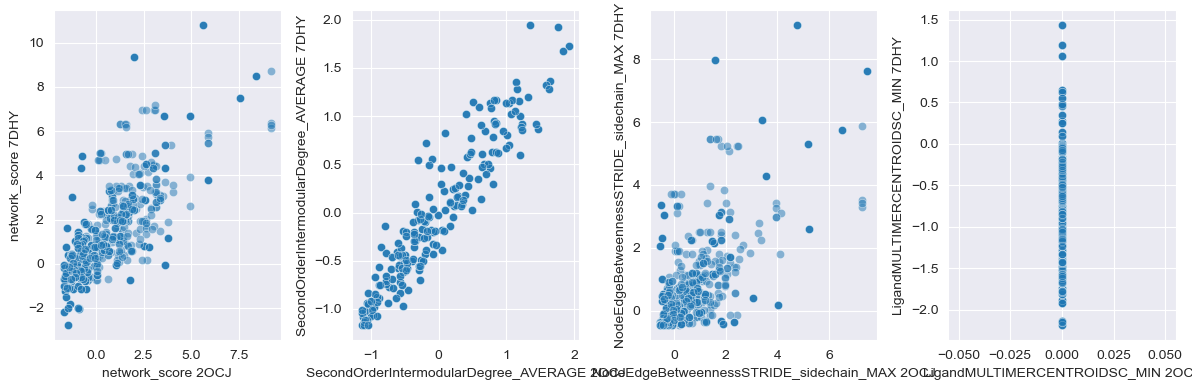

In [30]:
ns_data = pd.read_csv("../lung_cancer/lung_genes_sbna.csv")

pdb1 = "2OCJ"
pdb2 = "7DHY"
pdb1_data = ns_data[ns_data['pdb_id']==pdb1]
pdb2_data = ns_data[ns_data['pdb_id']==pdb2]

merged_data = pd.merge(pdb1_data, pdb2_data, on=["chain", 'uniprot_num'], suffixes=('_pdb1', '_pdb2'))

cols = ['network_score', 'SecondOrderIntermodularDegree_AVERAGE', 'NodeEdgeBetweennessSTRIDE_sidechain_MAX', 'LigandMULTIMERCENTROIDSC_MIN']

fig, axes = plt.subplots(1, 4, figsize=(12, 4))
                         
for idx, col in enumerate(cols):
    sns.scatterplot(data=merged_data, x=f"{col}_pdb1", y=f"{col}_pdb2", alpha=0.5, ax=axes[idx])
    axes[idx].set_xlabel(f"{col} {pdb1}")
    axes[idx].set_ylabel(f"{col} {pdb2}")
plt.tight_layout()
plt.show()

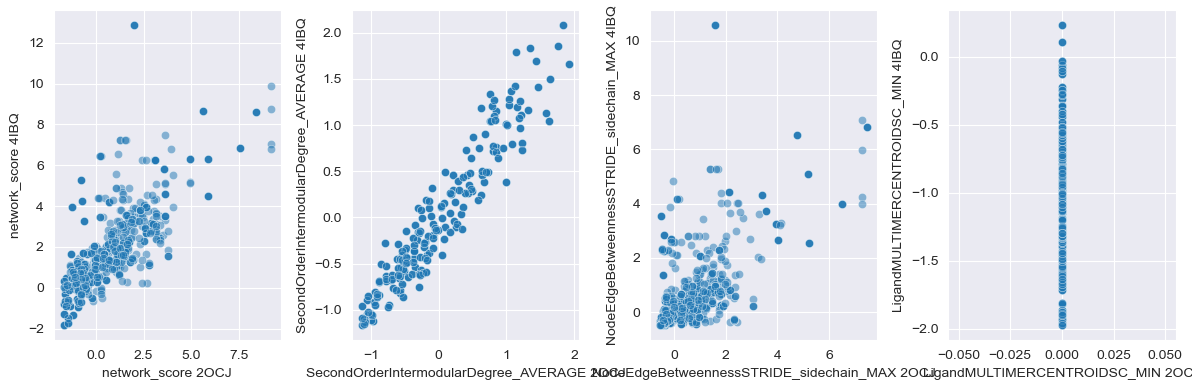

In [32]:
ns_data = pd.read_csv("../lung_cancer/lung_genes_sbna.csv")

pdb1 = "2OCJ"
pdb2 = "4IBQ"
pdb1_data = ns_data[ns_data['pdb_id']==pdb1]
pdb2_data = ns_data[ns_data['pdb_id']==pdb2]

merged_data = pd.merge(pdb1_data, pdb2_data, on=["chain", 'uniprot_num'], suffixes=('_pdb1', '_pdb2'))

cols = ['network_score', 'SecondOrderIntermodularDegree_AVERAGE', 'NodeEdgeBetweennessSTRIDE_sidechain_MAX', 'LigandMULTIMERCENTROIDSC_MIN']

fig, axes = plt.subplots(1, 4, figsize=(12, 4))
                         
for idx, col in enumerate(cols):
    sns.scatterplot(data=merged_data, x=f"{col}_pdb1", y=f"{col}_pdb2", alpha=0.5, ax=axes[idx])
    axes[idx].set_xlabel(f"{col} {pdb1}")
    axes[idx].set_ylabel(f"{col} {pdb2}")
plt.tight_layout()
plt.show()

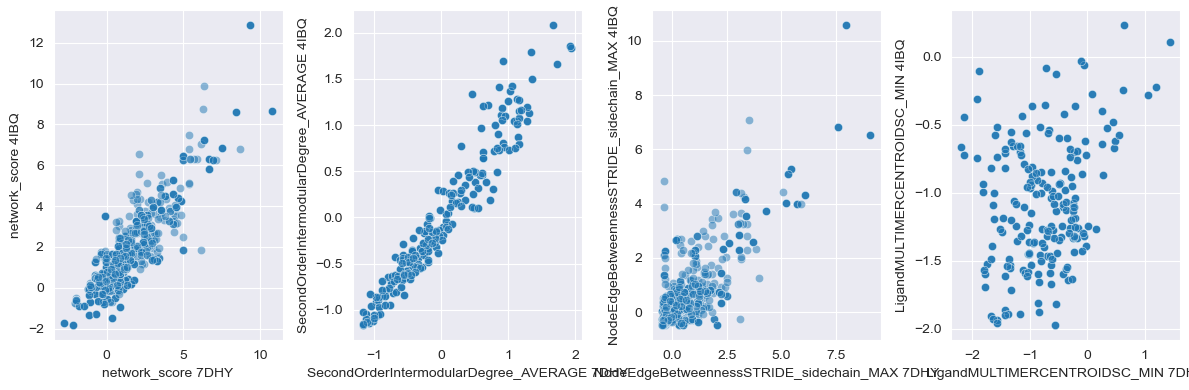

In [36]:
ns_data = pd.read_csv("../lung_cancer/lung_genes_sbna.csv")

pdb1 = "7DHY"
pdb2 = "4IBQ"
pdb1_data = ns_data[ns_data['pdb_id']==pdb1]
pdb2_data = ns_data[ns_data['pdb_id']==pdb2]

merged_data = pd.merge(pdb1_data, pdb2_data, on=["chain", 'uniprot_num'], suffixes=('_pdb1', '_pdb2'))

cols = ['network_score', 'SecondOrderIntermodularDegree_AVERAGE', 'NodeEdgeBetweennessSTRIDE_sidechain_MAX', 'LigandMULTIMERCENTROIDSC_MIN']

fig, axes = plt.subplots(1, 4, figsize=(12, 4))
                         
for idx, col in enumerate(cols):
    sns.scatterplot(data=merged_data, x=f"{col}_pdb1", y=f"{col}_pdb2", alpha=0.5, ax=axes[idx])
    axes[idx].set_xlabel(f"{col} {pdb1}")
    axes[idx].set_ylabel(f"{col} {pdb2}")
plt.tight_layout()
plt.show()